# *Final Project - Marco Frank*
# Application of Monte Carlo Simulation for Plutonium 238, 239, and 240 Decay Chains

In [3]:
# Defining all libraries I will be using
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
import sys
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]


# Derivation of Discrete Radioactive Decay Law

There is a sample containing $ N(t) $ radioactive nuclei at time $ t $. Over a small time interval $ \Delta t $, and let $ \Delta N $ represent the number of nuclei that decay.

The probability $ \mathcal{P} $ of any single nucleus decaying per unit time is constant. This can be expressed as:

$$ \mathcal{P} = \frac{\Delta N}{N(t) \Delta t} $$

and

$$ \frac{\Delta N}{\Delta t} = -\lambda N(t) $$

Where $ \lambda $ is a constant called the *decay rate* and the negative sign indicates the fact that $N(t)$, the number of nuclei, decreases over time.

### Important insights:
1. **Exponential Decay**: The number of nuclei $N(t)$ decreases exponentially over time, as derived from the equation:
$$ \frac{dN(t)}{dt} = -\lambda N(t) $$
   Solving this differential equation yields:
$$ N(t) = N_0 e^{-\lambda t} $$
   where $N_0$ is the initial number of nuclei.

2. **Activity**: The activity, defined as the rate of decay $ \frac{\Delta N}{\Delta t} $, is proportional to the number of nuclei $ N(t) $ and also decreases exponentially over time:
   $$ A(t) = \lambda N(t) = \lambda N_0 e^{-\lambda t} $$

### Simplified Explanation:
- Each nucleus has a constant probability of decaying per unit time ($ \lambda $).
- This leads to an exponential decrease in the total number of nuclei over time.
- The decay rate is directly proportional to the number of nuclei remaining and decreases in the same exponential manner.

# Continuous Decay and Exponential Decay Law

When the number of particles $N$ becomes very large ($N \to \infty $) and the observation time interval becomes very small ($ \Delta t \to 0 $), the difference equation describing radioactive decay transitions into a differential equation:
$$\frac{dN(t)}{dt} = -\lambda N(t)$$

Where $\lambda$ is the decay rate and $N(t)$ is the number of particles at time $t$.

### Solving the Differential Equation
$$ \frac{dN}{N} = -\lambda dt $$
$$ \int \frac{1}{N} dN = -\lambda \int dt $$
$$ \ln N = -\lambda t + C $$
$$ N(t) = e^{-\lambda t + C} = N_0 e^{-\lambda t} $$

Where $N_0$ is the initial number of particles at $t = 0$.

### Exponential Decay Law
The solution gives the familiar exponential decay law:
$$ N(t) = N_0 e^{-\lambda t} = N_0 e^{-t / \tau} $$

Where $ \tau = \frac{1}{\lambda} $ is the *lifetime* of the particles.

### Key Points:
1. **Large $N$, Continuous Decay**:
   - The exponential decay law is an excellent approximation for large numbers of particles ($\Delta N / N \ll 1 $).
   - The decay is deterministic and follows a smooth exponential curve.

2. **Small $N$, Statistical Fluctuations**:
   - When $N(t)$ becomes small, the decay process is no longer smooth but stochastic (random).
   - The fundamental law ($\frac{dN}{dt} = -\lambda N$) remains valid, but the exponential decay approximation becomes less accurate due to statistical noise.

3. **Decay Rate, Lifetime, and Half Life**:
   - The decay rate $\lambda$ is related to the lifetime $\tau$ by:
     $$\lambda = \frac{1}{\tau}$$
   - And Lifetime is related to half life by
     $$\tau = \frac{T_{1/2}}{ln(2)}$$
     and thus
     $$\lambda = \frac{ln(2)}{T_{1/2}}$$
   - Where smaller $\lambda$ (or larger $\tau$) means the particles decay more slowly.

# My steps for the Monte Carlo Simulation of Radioactive Decay

### Key Steps

#### 1. **Probability of Decay**
For each nucleus, the probability of decaying in a small time interval $\Delta t$ is:
$$ P_{\text{decay}} = \lambda \Delta t $$
- $\lambda$: Decay rate (constant).
- $\Delta t$: Time step.

#### 2. **Randomness**
The Monte Carlo method simulates the randomness of decay:
1. For each nucleus, generate a random number $r$ between 0 and 1.
2. If $r \leq P_{\text{decay}}$, the nucleus decays.
3. If $r > P_{\text{decay}}$, the nucleus survives to the next step.

#### 3. **Tracking Remaining Nuclei**
At each time step:
- Count the number of nuclei $N(t)$ remaining.
- Update $N(t)$ based on the number of decayed nuclei.

#### 4. **Exponential Decay Validation**
Compare the simulation results to the theoretical decay law:
$$ N(t) = N_0 e^{-\lambda t} $$
- Plot $N(t)$ vs. $t$ from the simulation and the theoretical curve.

#### 5. **Activity**
Track the activity $A(t)$, which is the rate of decay:
$$ A(t) = \lambda N(t)$$
- In the simulation, calculate $A(t)$ as the number of decays in each step divided by $\Delta t$.

#### 6. **Decay Rate Calculation**
The method to calculate the decay rate is 
$$ \lambda = \frac{1}{\tau}$$
where $\tau$ is the lifetime of the element, but I have the half life data, thus using the equation
$$ \tau = \frac{T_{1/2}}{ln(2)}$$
and substituting
$$ \lambda = \frac{ln(2)}{T_(1/2} $$
Which I will calculate provided every half life.

---

### Monte Carlo Simulation Steps
1. **Initialize Variables**:
   - $N_0$: Initial number of nuclei (e.g., $10^4$).
   - $\lambda$: Decay rate(handling of $\lambda = 0$ is because if it is 0, there will not be a random number selecting it thus its expected to never occur.
   - $\Delta t$: Time step (small enough to ensure $P_{\text{decay}} \ll 1$).
   - $T_{\text{max}}$: Total simulation time.
   - Initialize the general stucture of the decay chain, will be using the similiefed decay chain, general rule will be ignoring anything less than 1%, but if to much will be lost i won't

2. **Simulation Loop**:
   - For each time $t$ from 0 to $T_{\text{max}}$ in steps of $\Delta t$:
     1. For each nucleus:
        - Generate a random number $r$.
        - If $r \leq P_{\text{decay}}$, can I just choose another random probability and then select the right field, update it in the dictionary?
     2. Update and make a copy of each step
     3. Update $N(t)$: Subtract decayed nuclei from total.
     4. Record $N(t)$ and/or $A(t)$.

3. **Validation and Visualization**:
   - Plot $N(t)$ vs. $t$ and compare it to $N(t) = N_0 e^{-\lambda t}$.
   - Optionally, plot $A(t) = \lambda N(t)$.

---

### Parameters to Choose
- $N_0$: Large enough (e.g., $10^4$) to reduce statistical noise.
- $T_{max}$: The total time ellipsed over
- $\Delta t$: Small enough to ensure $P_{\text{decay}} \ll 1$ (e.g., $\Delta t \approx 0.01 \, \tau$).
- Decay chain definition, with the decay rate having 4 significant figures(I don't want to deal with to many decimals)
- Isotope for the graph naming
- Time units for the units of time indicator

In [7]:
def exponential_decay(N0, decayrate, times):
    return N0 * np.exp(-decayrate * np.array(times))

def MonteCarloDecayChain(N0, T_max, delta_t, DecayChain, isotope, timeunits):
    # Initialize counts
    nuclei_counts = {key: 0 for key in DecayChain}
    mode_counts = {mode: 0 for key in DecayChain for _, mode, _ in DecayChain[key][1:]}
    nuclei_counts[next(iter(DecayChain))] = N0 # Dictionary is ordered in python 3.7 and beyond 
    
    # To store results
    time_steps = []
    counts_history = {key: [] for key in DecayChain}
    mode_history = {mode: [] for mode in mode_counts}

    # Initialize number of loops
    loops = int(T_max/delta_t)
    
    # Simulation Loop
    for t in range(loops):
        time = t * delta_t
        time_steps.append(time)
        
        # Copy the current counts to modify
        new_counts = nuclei_counts.copy()
        mode_updates = {mode: 0 for mode in mode_counts}  # Track updates for this time step
        
        for nucleus, count in nuclei_counts.items():
            if count == 0 or nucleus not in DecayChain:
                continue
            
            # Extract decay rate and decay options
            decay_info = DecayChain[nucleus]
            if not decay_info:  # Stable nucleus, no decay
                continue
            
            decay_rate = decay_info[0]
            decay_options = decay_info[1:]
            
            # Probability of decay for this nucleus
            P_decay = decay_rate * delta_t
            
            for _ in range(count):
                # Check if this nucleus decays
                if random.random() <= P_decay:
                    # Determine the decay product for branch
                    decay_random = random.random()
                    cumulative_prob = 0
                    for product, mode, prob in decay_options:
                        cumulative_prob += prob
                        if decay_random <= cumulative_prob:
                            # Update counts for decay products
                            new_counts[product] += 1
                            mode_updates[mode] += 1  # Track decay mode
                            break
                    # Subtract decayed nucleus
                    new_counts[nucleus] -= 1
        
        # Update counts
        nuclei_counts = new_counts
        
        # Update mode counts
        for mode in mode_counts:
            mode_counts[mode] += mode_updates[mode]
        
        # Record current counts
        for key in counts_history:
            counts_history[key].append(nuclei_counts[key])
        for mode in mode_history:
            mode_history[mode].append(mode_counts[mode])
    
    # Validation and Visualization
    plt.figure(figsize=(10, 6))
    for nucleus, counts in counts_history.items():
        if sum(counts) > 0:  # Only plot nuclei that exist
            plt.plot(time_steps, counts, label=nucleus)
    plt.plot(time_steps, exponential_decay(N0, DecayChain[next(iter(DecayChain))][0], time_steps), label="expected")
    plt.xlabel("Time (s)")
    plt.ylabel("Number of Nuclei")
    plt.title(f"Simulation of {isotope} Decay Chain Population Dynamics")
    plt.legend(loc="upper right")
    plt.grid()
    plt.show()

    # Plot decay modes
    plt.figure(figsize=(10, 6))
    for mode, counts in mode_history.items():
        plt.plot(time_steps, counts, label=mode)
    plt.xlabel(f"Time ({timeunits})")
    plt.ylabel("Cumulative Count")
    plt.title("Decay Modes over Time")
    plt.legend(loc="upper right")
    plt.grid()
    plt.show()

# Helium 8 Decay Chain
### Background
I began with with Helium 8 to test when developing and designing the program to handle the lengthy decay chains, I will be using Helium 8 due to its simple decay chain with pretty clear branching probabilities. And for future decay chains to avoid encountering excessive compleixity, floating point errors due to low branching probabilities, and difficult to find probabilities, after consideration I will only consider branching probabilites with a probabilites of occuring being greater than 1% in the future simulations.

Below is a graph of the decay process that was provided by periodictable.com.

![Helium 8 Decay Chain](./Resources/Helium8DecayChain.jpg) 


These are the calculated decay rates from the provided half lifes I found, which where done in google sheets, with the Decay rates being retrieved by applying the expression 
$$\lambda = \frac{ln(2)}{T_{1/2}}$$

and the results are in the table below
| Element | Half Life (s)               | Decay Rate ($s^{-1}$) |
|---------|-----------------------------|-----------------------|
| He8     | 0.119                       | 5.824766223           |
| He5     | $7.603(10^{-13})$           | $9.11676(10^{20})$    |
| Li8     | 0.839                       | 0.8262572185          |
| Li7     | Stable                      | Stable                |
| He4     | Stable                      | Stable                | 


Table of Decays that occur, including their probability of occuring, mode of decay and daughter products is below.
| Parent | Probability (\%) | Mode             | Daughter |
|--------|------------------|------------------|----------|
| He8    | 0.9              | $\beta^- t$      | He5      |
| He8    | 83               | $\beta^-$        | Li8      |
| He8    | 16.1             | $\beta^- n$      | Li7      |
| He5    | 100              | $n$              | He4      |
| Li8    | 100              | $\beta^- \alpha$ | He4      |


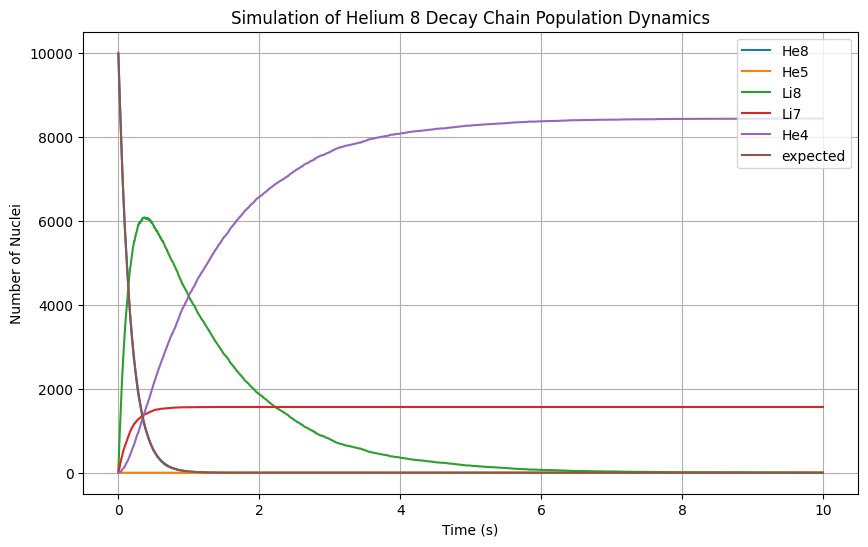

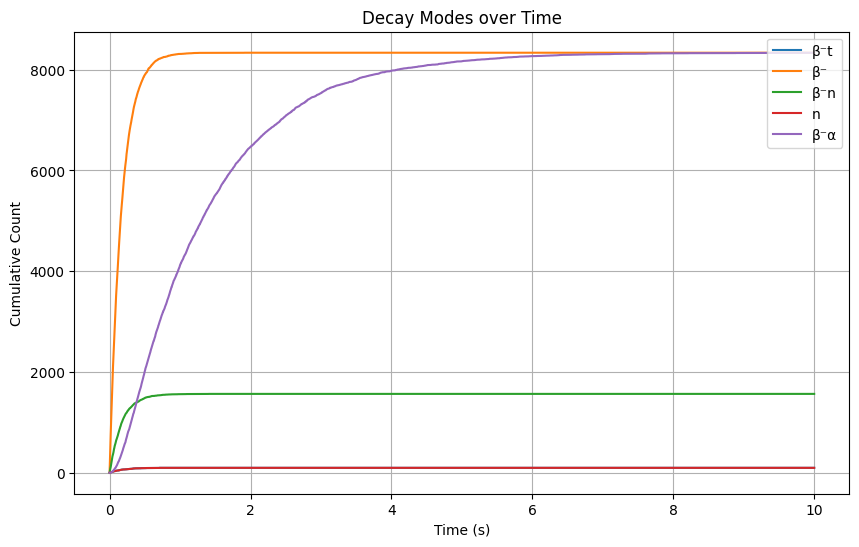

In [9]:
# Defined Decay Chain
Helium8Chain = {
    "He8": [5.825, 
            ["He5", "β⁻t", 0.009], 
            ["Li8", "β⁻", 0.83], 
            ["Li7", "β⁻n", 0.161]],
    "He5": [9.117e+20, 
            ["He4", "n", 1]],
    "Li8": [0.8263, 
            ["He4", "β⁻α", 1]],
    "Li7": [],  # Stable
    "He4": []   # Stable
}

# Simulation for short timescale
N0 = 10000           # Initial number of Helium-8 nuclei
T_max = 10           # Total simulation time
delta_t = 0.001        # Time step
isotope = "Helium 8" # Isotope to title with
timeunits = "s"      # Units of time
MonteCarloDecayChain(N0, T_max, delta_t, Helium8Chain, isotope, timeunits)

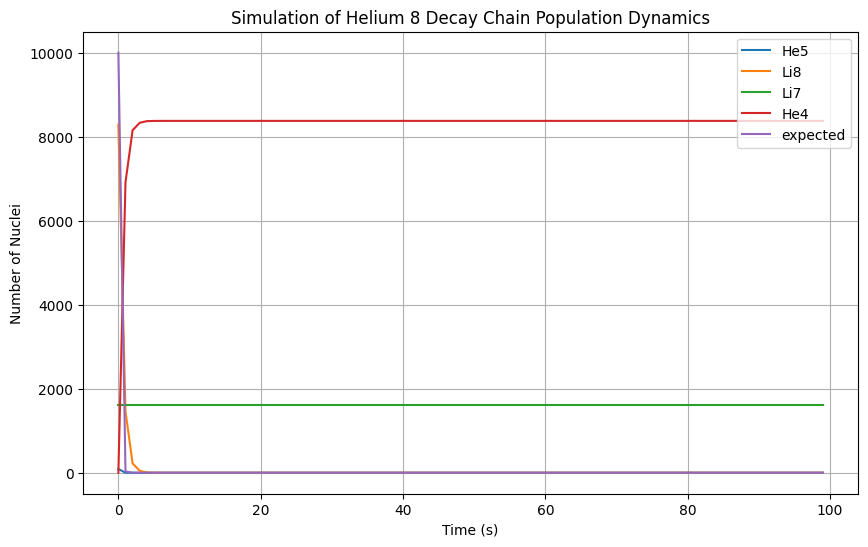

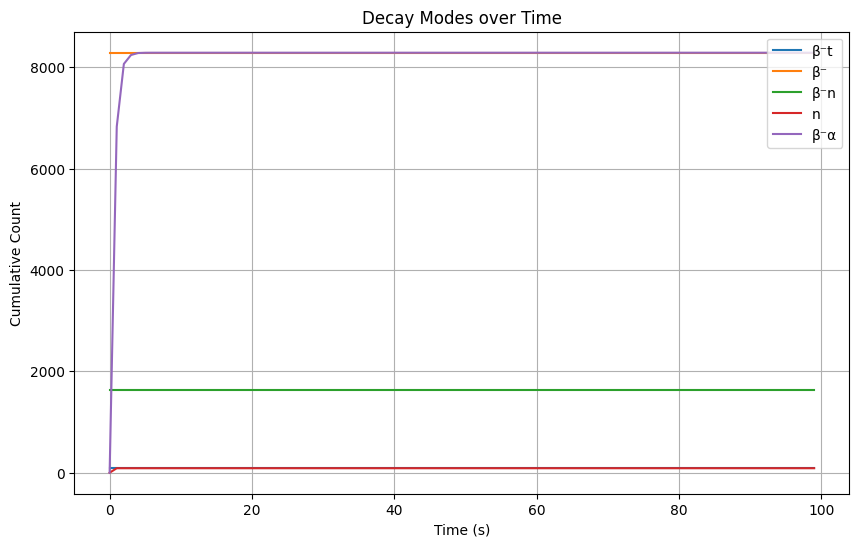

In [11]:
# Simulation for longer timescale
N0 = 10000           # Initial number of Helium-8 nuclei
T_max = 100           # Total simulation time
delta_t = 1        # Time step
isotope = "Helium 8" # Isotope to title with
timeunits = "s"      # Units of time
MonteCarloDecayChain(N0, T_max, delta_t, Helium8Chain, isotope, timeunits)

### Helium 8 Decay Chain Analysis

In the short timescale it can be observed the fast growth and flattening of Lithium 7 which is a recieved from the decay process of Helium 5, this shape of growth is expected due to He5's incredibly short half life, as soon as it is created is then becomes Li7, which is part of why its graph is incredibly flat, the other being its low probability of being the decay result of He8. This can also be observed in the Decay mode over time graph which shows how the isotope appears in low quantities. These same behaviors can be observed in the long timescale with Helium 8 decaying into a stable isotope very early in the graph. Also Helium 8 follows pretty much exactly the graph shape of its exponential decay function, which has also been graphed.

# Plutonium 238 Decay Chain
### Background
I initially planned to study this last due to the ridicolous complexity in its decay chain, however as mentioned earlier I will be ignoring decay products that have a possiblility of occuring for less than 1%, which removes a vast majority of the isotopes which must be considered. However it must be noted that doing so does remove some the other possible stable results that can be reached, this can be observed in the image below.

![Plutonium 238 Ridiculous Decay Chain](Resources/Plutonium238DecayChain.jpg)

However I will use this much more simplifed graph of the decay chain to more simply illustrate the process more cleanly.

![Plutonium 238 Decay Chain](Resources/Plutonium238Decay.svg)

Using provided Half lifes it can be observed there is a much larger difference in Half Life of isotopes, thus the results of observing short time scale and long time scale will be much more different, as due to Plutonium 238's length half life, the likely hood of anything happening in a short time frame is incredibly small. Some of the calculations resulted in 0 from spreadsheet, however this is due to spreadsheet's limit on size and the issue of floating point errors. I decided it would be best to have a seconds and years calculation for the short and long term simulations.

Table of Half Lifes and Decay Rates

| Element | Half Life (s)       | Half Life (y)        | Decay Rate ($s^{-1}$)       | Decay Rate ($y^{-1}$)       |
|---------|---------------------|----------------------|-----------------------------|-----------------------------|
| Pu238   | 277000000           | 87.82498415          | 0.0000000025023             | 0.00789236898               |
| U234    | 774000000000        | 245402.6633          | $8.955(10^{-14})$           | 0.00000282452998            |
| Th230   | 2380000000000       | 75459.73367          | $2.912(10^{-13})$           | 0.00000918565633            |
| Ra226   | 5000000000          | 1585.288523          | $1.386(10^{-11})$           | 0.0004372372415             |
| Rn222   | 330307              | 0.01047263792        | 0.00000209849376            | 66.1864934                  |
| Po218   | 7910289             | 0.2508018072         | 0.00000008762602            | 2.763724824                 |
| Pb214   | 70509317            | 2.235552219          | 0.0000000983057             | 0.3100563586                |
| Bi214   | 52300000            | 1.658211795          | 0.0000001325329             | 0.4180088351                |
| Po214   | 0.0001643           | 0                    | 4218.7899                   | 133060633444                |
| Pb210   | 701000000           | 22.22574509          | 0.00000000098879            | 0.03118667914               |
| Bi210   | 432864              | 0.0137428662         | 0.0000160130475             | 50.50515191                 |
| Po210   | 11956032            | 0.3790752061         | 0.00000005797468            | 1.82821543                  |
| Pb206   | Stable              | Stable               | Stable                      | Stable                      |




Table of Decays that occur

| Parent  | Probability (\%) | Mode       | Daughter |
|---------|------------------|------------|----------|
| Pu238   | 100              | $\alpha$   | U234     |
| U234    | 100              | $\alpha$   | Th230    |
| Th230   | 100              | $\alpha$   | Ra226    |
| Ra226   | 100              | $\alpha$   | Rn222    |
| Rn222   | 100              | $\alpha$   | Po218    |
| Po218   | 100              | $\alpha$   | Pb214    |
| Pb214   | 100              | $\beta^-$  | Bi214    |
| Bi214   | 100              | $\beta^-$  | Po214    |
| Po214   | 100              | $\alpha$   | Pb210    |
| Pb210   | 100              | $\beta^-$  | Bi210    |
| Bi210   | 100              | $\beta^-$  | Po210    |
| Po210   | 100              | $\alpha$   | Pb206    |

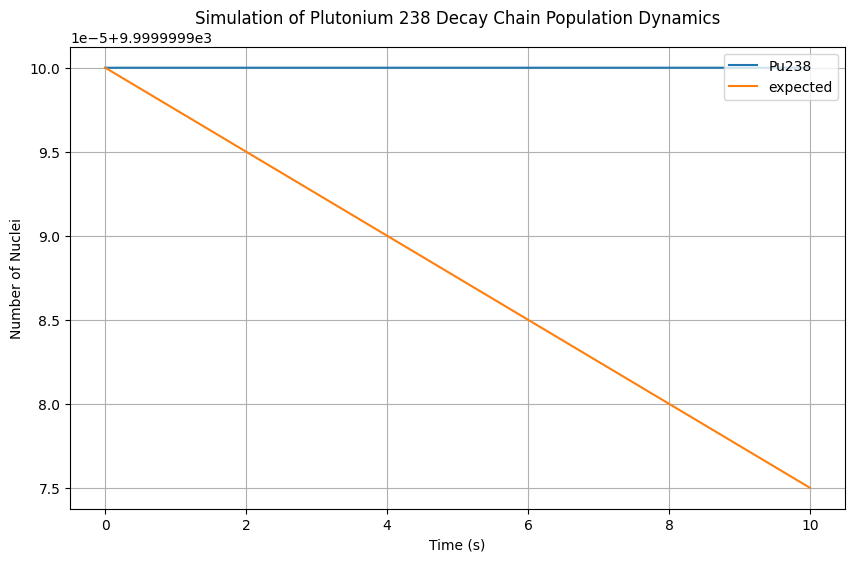

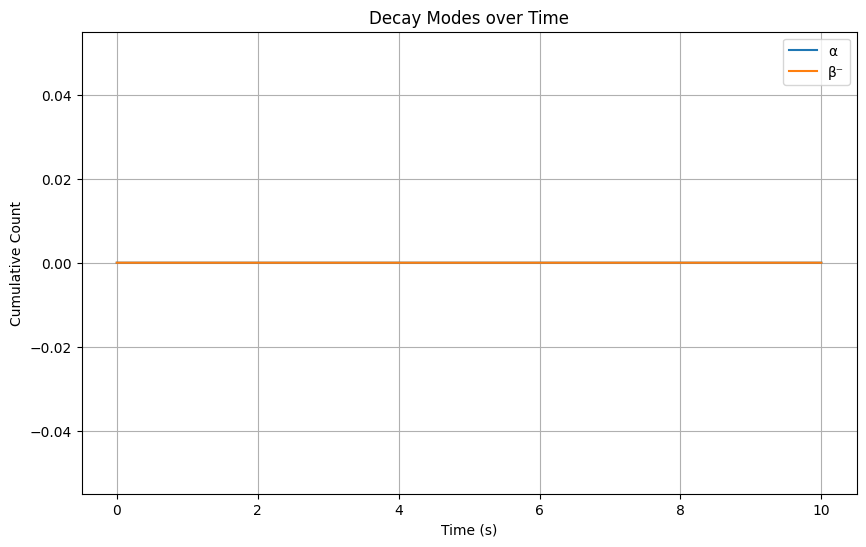

In [15]:
# Simulation for short time scale
# Defined Decay Chain
Plutonium238Chain = {
    "Pu238":  [2.500e-10, ["U234", "α", 1]], 
    "U234":   [8.955e-14, ["Th230", "α", 1]], 
    "Th230":  [2.912e-13, ["Ra226", "α", 1]], 
    "Ra226":  [1.386e-11, ["Rn222", "α", 1]], 
    "Rn222":  [2.098e-6, ["Po218", "α", 1]], 
    "Po218":  [8.763e-8, ["Pb214", "α", 1]],
    "Pb214":  [9.830e-8, ["Bi214", "β⁻", 1]], 
    "Bi214":  [1.325e-7, ["Po214", "β⁻", 1]],
    "Po214":  [4.219e+3, ["Pb210", "α", 1]],
    "Pb210":  [9.880e-10, ["Bi210", "β⁻", 1]], 
    "Bi210":  [1.601e-5, ["Po210", "β⁻", 1]],
    "Po210":  [5.797e-8, ["Pb206", "α", 1]], 
    "Pb206":  []  # Stable
}


# Parameters
N0 = 10000                # Initial number of Helium-8 nuclei
T_max = 10               # Total simulation time
delta_t = 0.001         # Time step
isotope = "Plutonium 238" # Isotope
timeunits = "s"           # Units of time

MonteCarloDecayChain(N0, T_max, delta_t, Plutonium238Chain, isotope, timeunits)

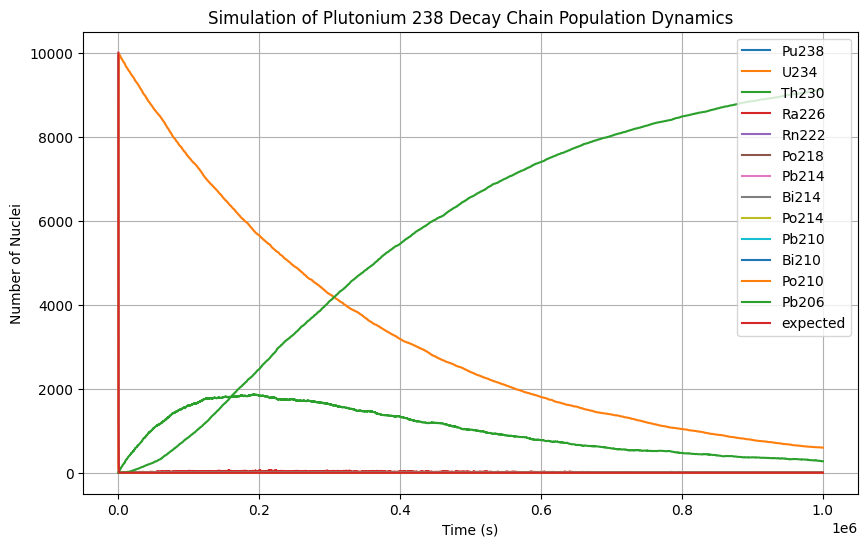

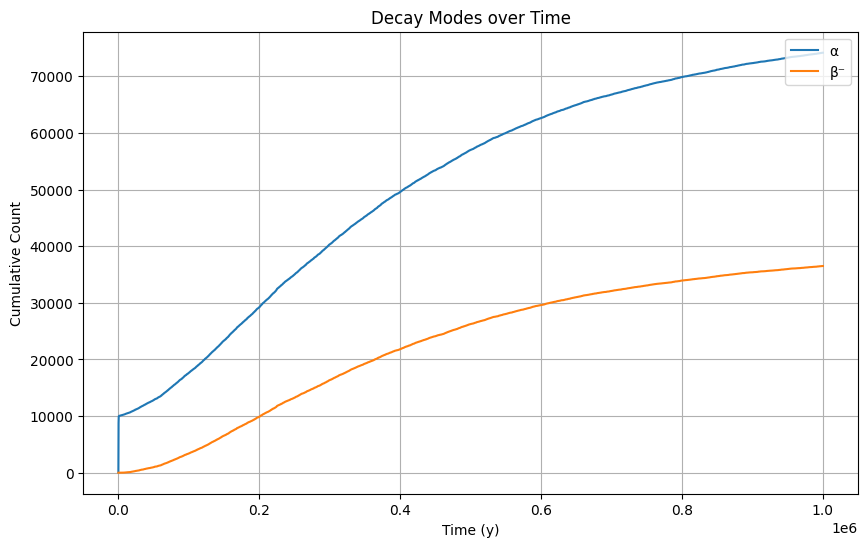

In [17]:
# Simulation for short time scale
# Defined Decay Chain
Plutonium238Chain = {
    "Pu238":  [0.007892, ["U234", "α", 1]], 
    "U234":   [0.000002825, ["Th230", "α", 1]], 
    "Th230":  [0.000009186, ["Ra226", "α", 1]], 
    "Ra226":  [0.0004372, ["Rn222", "α", 1]], 
    "Rn222":  [66.19, ["Po218", "α", 1]], 
    "Po218":  [2.764, ["Pb214", "α", 1]],
    "Pb214":  [0.3101, ["Bi214", "β⁻", 1]], 
    "Bi214":  [0.4180, ["Po214", "β⁻", 1]],
    "Po214":  [1.331e+11, ["Pb210", "α", 1]],
    "Pb210":  [0.03119, ["Bi210", "β⁻", 1]], 
    "Bi210":  [50.51, ["Po210", "β⁻", 1]],
    "Po210":  [1.828, ["Pb206", "α", 1]], 
    "Pb206":  []  # Stable
}


# Parameters
N0 = 10000                     # Initial number of Helium-8 nuclei
T_max = 1000000               # Total simulation time
delta_t = 1                   # Time step
isotope = "Plutonium 238"      # The Isotope
timeunits = "y"                # Units of time

MonteCarloDecayChain(N0, T_max, delta_t, Plutonium238Chain, isotope, timeunits)

### Plutonium 238 Decay Chain Analysis
The short term result is unsuprisingly pretty much zero due to the extremely small decay rate a result of Plutonium 238's decent stability meaning it has a decently lengthy half life. Unfortuntely it doesn't follow the trend of expected exponential decay of Plutonium 238. However the long time scale results in a much more accurate result for the population dynamics of the decay products of Pu238, as each product appears and decays over a shorter time as the element becomes more stable, due to shorter half lifes. However these much short have live are exteremly difficult to observe as due to the the time scale and time step they exist very briefly before being broken done. And Plutonium 238 does seem to follow its expected exponential decay.

# Plutonium 239 Decay Chain
Again I will ignore the branch probabilities for cases where the mode of decay occuring is less than 1% and was able to vastly simiplify the decay chain process and below is a vastly simplied Plutonium 239 decay chain graph.

![Plutonium 239 Decay Chain](Resources/Plutonium239Decay.svg)

Using provided Half lifes it can be observed there is a much larger difference in Half Life of isotopes, thus the results of observing short time scale and long time scale will be much more different, as due to Plutonium 239's length half life, the likely hood of anything happening in a short time frame is incredibly small. Some of the calculations resulted in 0 from spreadsheet, however this is due to spreadsheet's limit on size and the issue of floating point errors. I decided it would be best to have a seconds and years calculation for the short and long term simulations.

Table of Half Lifes and Decay Rates

| Element | Half Life (s)       | Half Life (y)         | Decay Rate ($s^{-1}$)      | Decay Rate ($y^{-1}$)      |
|---------|---------------------|-----------------------|----------------------------|----------------------------|
| Pu239   | 7600000000000       | 24096.38554           | $9.120(10^{-13})$          | 0.00002876560799           |
| U235    | 2.22E+16            | 703868104             | $3.122(10^{-17})$          | 0.000000000098476          |
| Th231   | 91584               | 0.002903741281        | 0.0000756843095            | 238.7083123                |
| Pa231   | 1030000000000       | 32656.94356           | $6.73(10^{-13})$           | 0.00002122510881           |
| Ac227   | 68700000            | 21.7818643            | 0.0000000100894            | 0.03182221554              |
| Th227   | 1613952             | 0.05117159163         | 0.0000042947195            | 13.54554663                |
| Fr223   | 56948822            | 1.805606278           | 0.0000001217140            | 0.3838861158               |
| Ra223   | 987552              | 0.03131109702         | 0.000070188423             | 22.13742879                |
| Rn219   | 3.96                | 0.00000012555485      | 0.1750371668               | 5520672.241                |
| Po215   | 0.001781            | $5.647(10^{-11})$     | 389.1898824                | 12275048891                |
| Pb211   | 95054864            | 3.013787698           | 0.0000000729207            | 0.2299920399               |
| Bi211   | 5623926             | 0.1783109068          | 0.0000012324969            | 3.887295472                |
| Ti207   | 12500000            | 0.3963221306          | 0.0000005545177            | 1.748948966                |
| Pb207   | Stable              | Stable                | Stable                     | Stable                     |



Table of Decays that occur within my simulation

| Parent  | Probability (\%) | Mode            | Daughter |
|---------|------------------|-----------------|----------|
| Pu239   | 100              | $ \alpha $      | U235     |
| U235    | 100              | $ \alpha $      | Th231    |
| Th231   | 100              | $ \beta^- $     | Pa231    |
| Pa231   | 100              | $ \alpha $      | Ac227    |
| Ac227   | 98.62            | $ \beta^- $     | Th227    |
| Ac227   | 1.38             | $ \alpha $      | Fr223    |
| Th227   | 100              | $ \alpha $      | Ra223    |
| Fr223   | 100              | $ \beta^- $     | Ra223    |
| Ra223   | 100              | $ \alpha $      | Rn219    |
| Rn219   | 100              | $ \alpha $      | Po215    |
| Po215   | 100              | $ \alpha $      | Pb211    |
| Pb211   | 100              | $ \alpha $      | Bi211    |
| Bi211   | 100              | $ \beta^- $     | Ti207    |
| Ti207   | 100              | $ \alpha $      | Pb207    |


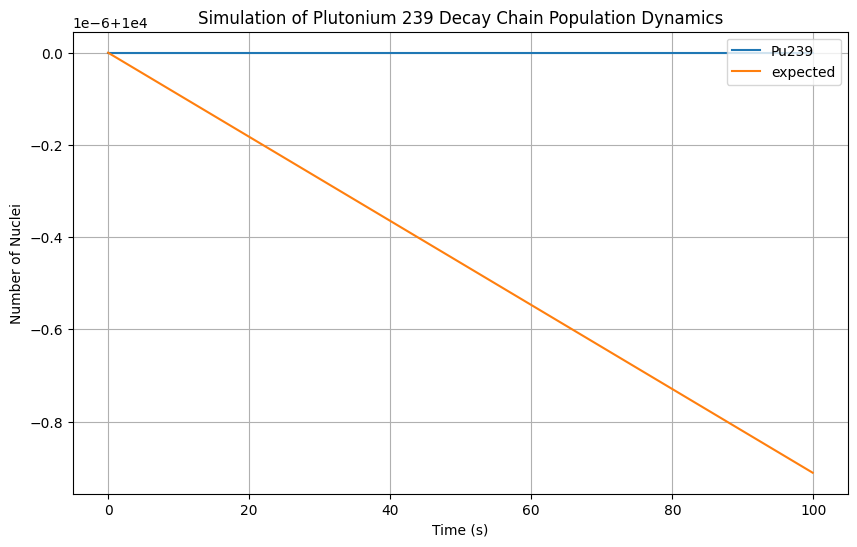

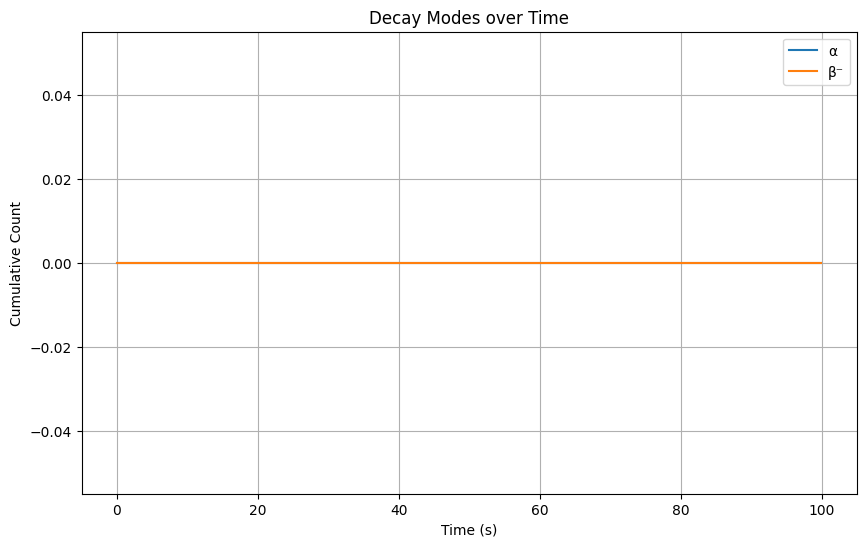

In [21]:
# Simulation for short time scale
# Defined Decay Chain
Plutonium239Chain = {
    "Pu239":  [9.120e-13, ["U235", "α", 1]],
    "U235":   [3.122e-17, ["Th231", "α", 1]],
    "Th231":  [0.00007568, ["Pa231", "β⁻", 1]], 
    "Pa231":  [6.73e-13, ["Ac227", "α", 1]],
    "Ac227":  [0.00000001009, ["Th227", "β⁻", 0.9862], ["Fr223", "α", 0.0138]],   
    "Th227":  [0.000004295, ["Ra223", "α", 1]],
    "Fr223":  [0.0000001217, ["Ra223", "β⁻", 1]], 
    "Ra223":  [0.00007019, ["Rn219", "α", 1]],
    "Rn219":  [0.1750, ["Po215", "α", 1]],
    "Po215":  [389.2, ["Pb211", "α", 1]], 
    "Pb211":  [0.00000007292, ["Bi211", "β⁻", 1]],
    "Bi211":  [0.000001232, ["Ti207", "α", 1]], 
    "Ti207":  [0.0000005545, ["Pb207", "β⁻", 1]],
    "Pb207":  []  # Stable
}

# Parameters
N0 = 10000                     # Initial number of Helium-8 nuclei
T_max = 100                    # Total simulation time
delta_t = 0.1                  # Time step
isotope = "Plutonium 239"      # The Isotope
timeunits = "s"                # Units

MonteCarloDecayChain(N0, T_max, delta_t, Plutonium239Chain, isotope, timeunits)

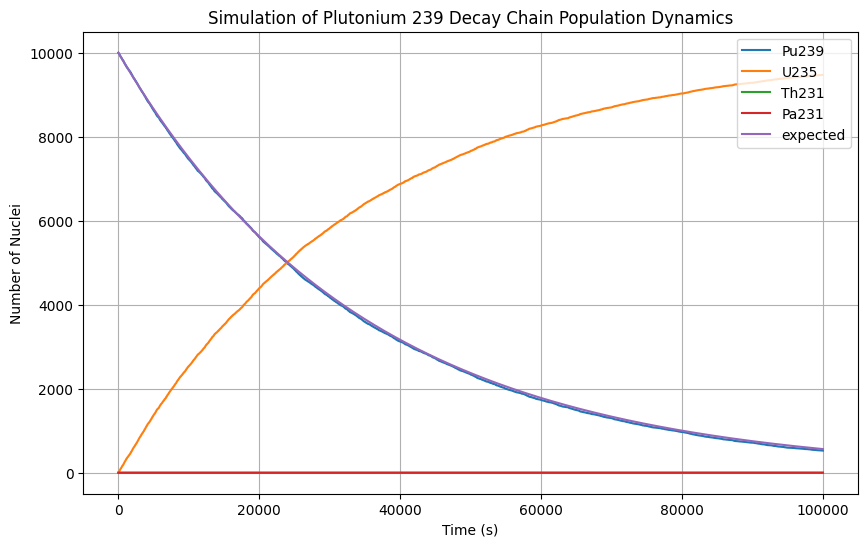

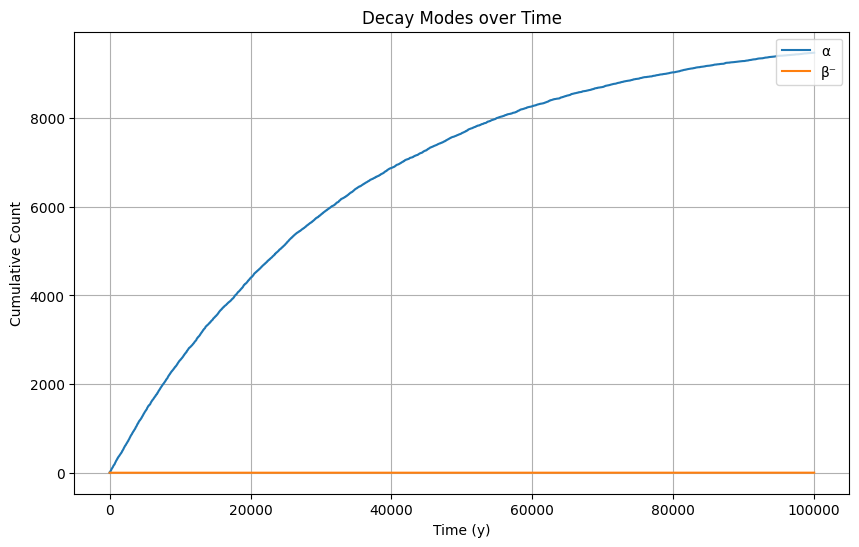

In [23]:
# Simulation for long time scale
# Defined Decay Chain
Plutonium239Chain = {
    "Pu239":  [0.00002877, ["U235", "α", 1]],
    "U235":   [0.00000000009848, ["Th231", "α", 1]],
    "Th231":  [238.7, ["Pa231", "β⁻", 1]], 
    "Pa231":  [0.00002123, ["Ac227", "α", 1]],
    "Ac227":  [0.03182, ["Th227", "β⁻", 0.9862], ["Fr223", "α", 0.0138]],   
    "Th227":  [13.55, ["Ra223", "α", 1]],
    "Fr223":  [0.3839, ["Ra223", "β⁻", 1]], 
    "Ra223":  [22.14, ["Rn219", "α", 1]],
    "Rn219":  [5.521e+6, ["Po215", "α", 1]],
    "Po215":  [1.228e+10, ["Pb211", "α", 1]], 
    "Pb211":  [0.2300, ["Bi211", "β⁻", 1]],
    "Bi211":  [3.887, ["Ti207", "α", 1]], 
    "Ti207":  [1.749, ["Pb207", "β⁻", 1]],
    "Pb207":  []  # Stable
}

# Parameters
N0 = 10000                     # Initial number of Helium-8 nuclei
T_max = 100000                 # Total simulation time
delta_t = 1                    # Time step
isotope = "Plutonium 239"      # The Isotope
timeunits = "y"                # Units

MonteCarloDecayChain(N0, T_max, delta_t, Plutonium239Chain, isotope, timeunits)

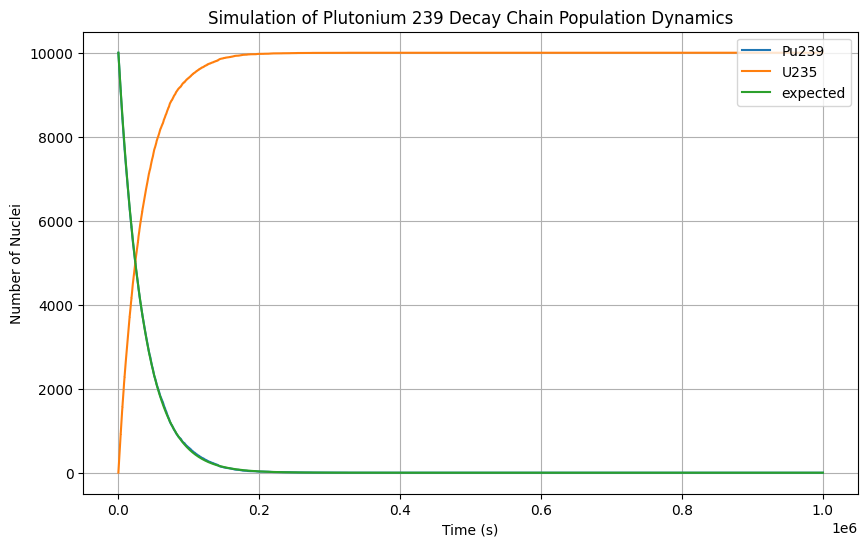

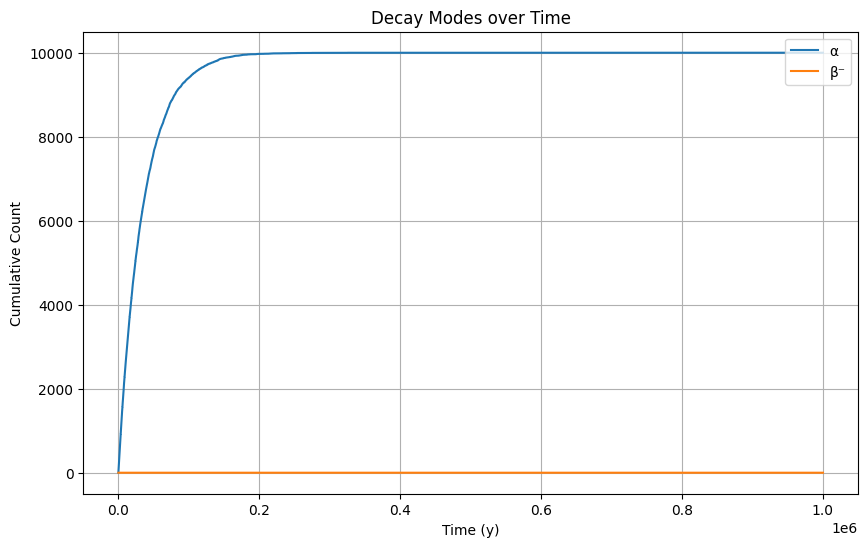

In [25]:
# Parameters
N0 = 10000                     # Initial number of Helium-8 nuclei
T_max = 1000000                # Total simulation time
delta_t = 10                   # Time step
isotope = "Plutonium 239"      # The Isotope
timeunits = "y"                # Units

MonteCarloDecayChain(N0, T_max, delta_t, Plutonium239Chain, isotope, timeunits)

### Decay 239 Decay Chain Analysis
The short term result is unsuprisingly pretty much zero due to the extremely small decay rate a result of Plutonium 239's decent stability meaning it has a decently lengthy half life. However the long time scale results in a much more accurate result for the population dynamics of the decay products of Pu239, of which I experiement with one in which the decay process has only managed to occur for Plutonium 239 and Uranium, 235 and then a longer longer one to observe all the rest, however again to the varying half lifes just a small change can result in it being made more difficult to observe the the direct behavior of the population dynamics of isotopes with much shorter half lives, this is made even more difficult by the time step which when set to a small value the program would run for a ridicoulus amount of time.

# Plutonium 240 Decay Chain
### Background
Again I will ignore the branch probabilities for cases where the mode of decay occuring is less than 1% and was able to vastly simiplify the decay chain process and below is the best graph I could find to demonstrate the usually very complex decay chain of Plutonium 240.

![Plutonium 240 Decay Chain](Resources/Plutonium240DecayChain.jpg)

Table of Half Lifes and Decay Rates

| Element | Half Life (s)       | Half Life (y)        | Decay Rate ($s^{-1}$)      | Decay Rate ($y^{-1}$)      |
|---------|---------------------|----------------------|----------------------------|----------------------------|
| Pu240   | 207000000000        | 6563.094483          | $3.349(10^{-12})$          | 0.0001056128603            |
| U236    | 7380000000000       | 233398858.59         | $9.392(10^{-16})$          | 0.00000002962311           |
| Th232   | 4.42E+17            | 14000000000          | $1.568(10^{-18})$          | 0.49510513e-10             |
| Ra228   | 181000000           | 5.738744451          | 0.00000000382954           | 0.1207837684               |
| Ac228   | 22104               | 0.00070082435        | 0.00003135845008           | 989.0455155                |
| Th228   | 60200000            | 1.908687381          | 0.00000001151407           | 0.3631538551               |
| Ra224   | 313632              | 0.009943944198       | 0.0000221006523            | 69.70545759                |
| Rn220   | 55.6                | 0.00000176284083     | 0.01246667591              | 393198.9582                |
| Po216   | 0.145               | 0.00000000459733     | 4.780325383                | 150771462.6                |
| Pb212   | 38304               | 0.001214457831       | 0.0000180959477            | 570.7461903                |
| Bi212   | 3600                | 0.0001141407736      | 0.0001925408835            | 6072.739465                |
| Po212   | 0.000000299         | $9.48(10^{-15})$     | 2318217.995                | 73116595568096             |
| Ti208   | 8015409             | 0.2541347178         | 0.0000008647683            | 2.727479293                |
| Pb208   | Stable              | Stable               | Stable                     | Stable                     |


Table of Decays that occur within my simulation

| Parent  | Probability (\%) | Mode            | Daughter |
|---------|------------------|-----------------|----------|
| Pu240   | 100              | $ \alpha $      | U236     |
| U236    | 100              | $ \alpha $      | Th232    |
| Th232   | 100              | $ \alpha $      | Pa228    |
| Ra228   | 100              | $ \beta^- $     | Ac228    |
| Ac228   | 100              | $ \beta^- $     | Th228    |
| Th228   | 100              | $ \alpha $      | Ra224    |
| Ra224   | 100              | $ \alpha $      | Rn220    |
| Rn220   | 100              | $ \alpha $      | Po216    |
| Po216   | 100              | $ \alpha $      | Pb212    |
| Pb212   | 100              | $ \beta^- $     | Bi212    |
| Bi212   | 64.05            | $ \beta^- $     | Po212    |
| Bi212   | 35.95            | $ \alpha $      | Ti208    |
| Po212   | 100              | $ \alpha $      | Pb208    |
| Ti208   | 100              | $ \beta^- $     | Pb208    |


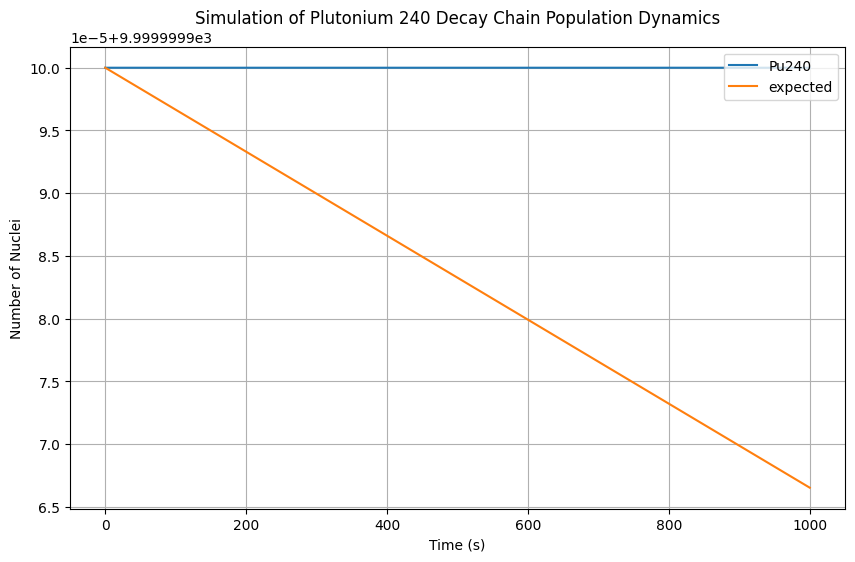

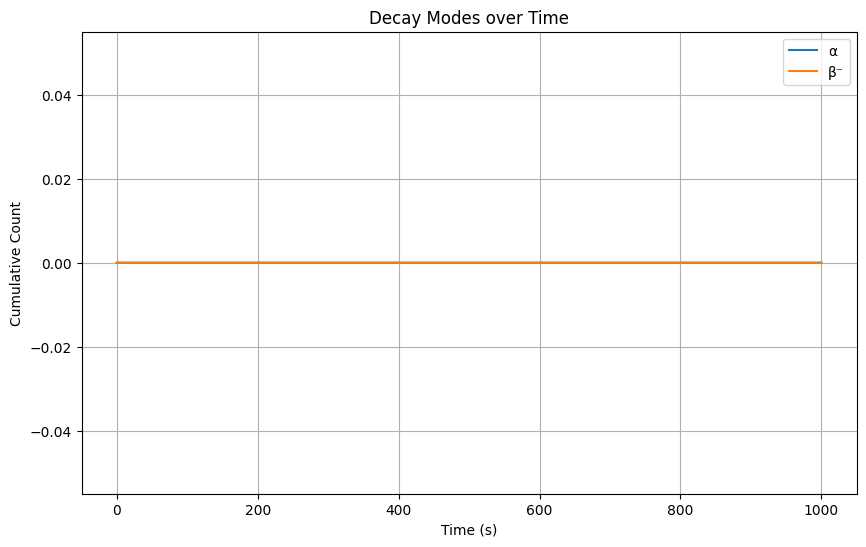

In [29]:
# Simulation for Short time scale
# Defined Decay Chain
Plutonium240Chain = {
    "Pu240":  [3.349e-12, ["U236", "α", 1]],
    "U236":   [9.392e-16, ["Th232", "α", 1]],
    "Th232":  [1.568e-18, ["Ra228", "α", 1]], 
    "Ra228":  [3.830e-9, ["Ac228", "β⁻", 1]],
    "Ac228":  [3.136e-5, ["Th228", "β⁻", 1]],   
    "Th228":  [1.151e-8, ["Ra224", "α", 1]],
    "Ra224":  [2.210e-5, ["Rn220", "α", 1]],
    "Rn220":  [0.01247, ["Po216", "α", 1]],
    "Po216":  [4.780, ["Pb212", "α", 1]], 
    "Pb212":  [1.810e-5, ["Bi212", "β⁻", 1]],
    "Bi212":  [1.925e-4, ["Po212", "β⁻", 0.6405], ["Ti208", "α", 0.3595]], 
    "Po212":  [2.318e+6, ["Pb208", "α", 1]],
    "Ti208":  [8.648e-7, ["Pb208", "β⁻", 1]], 
    "Pb208":  []  # Stable
}


# Parameters
N0 = 10000                     # Initial number of Helium-8 nuclei
T_max = 1000                    # Total simulation time
delta_t = 0.1                  # Time step
isotope = "Plutonium 240"      # The Isotope
timeunits = "s"                # Units

MonteCarloDecayChain(N0, T_max, delta_t, Plutonium240Chain, isotope, timeunits)

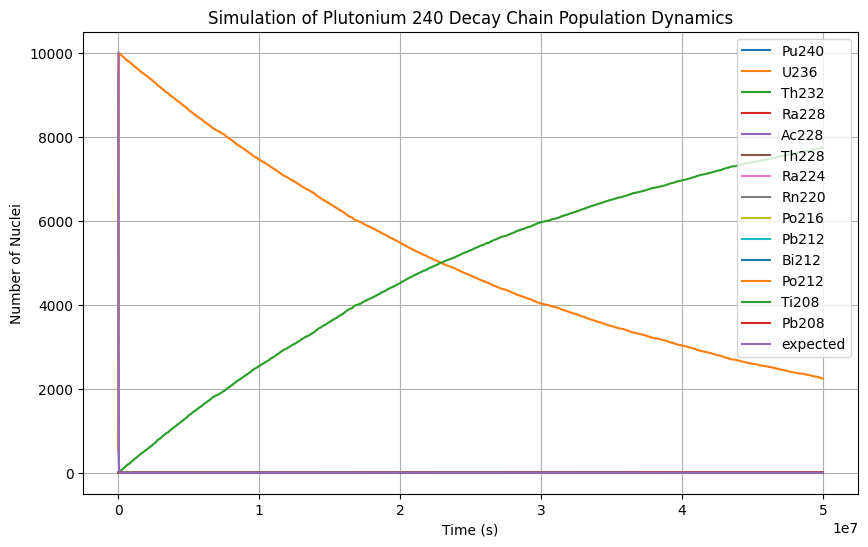

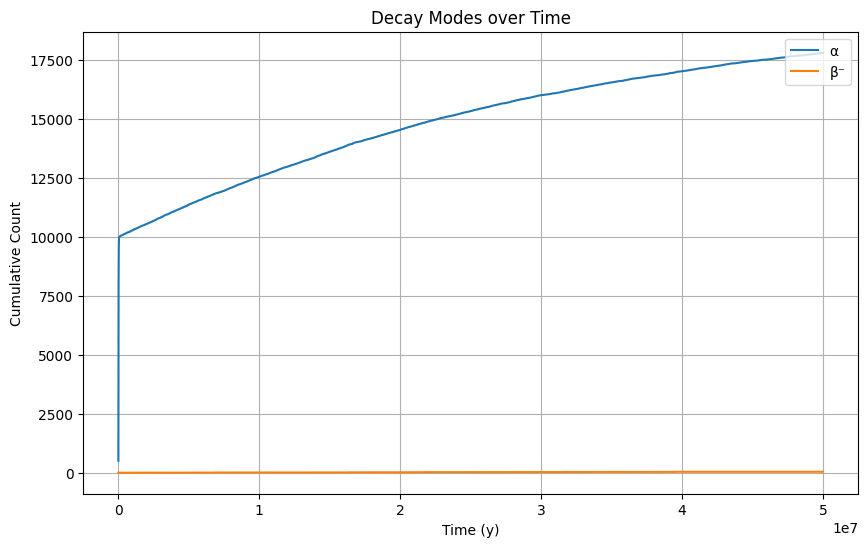

In [9]:
# Simulation for Long time scale
# Defined Decay Chain
Plutonium240Chain = {
    "Pu240":  [0.0001056, ["U236", "α", 1]],
    "U236":   [2.962e-8, ["Th232", "α", 1]],
    "Th232":  [4.951e-11 , ["Ra228", "α", 1]], 
    "Ra228":  [0.1208, ["Ac228", "β⁻", 1]],
    "Ac228":  [989.0, ["Th228", "β⁻", 1]],   
    "Th228":  [0.3632, ["Ra224", "α", 1]],
    "Ra224":  [69.71, ["Rn220", "α", 1]],
    "Rn220":  [3.932e+5, ["Po216", "α", 1]],
    "Po216":  [1.508e+8, ["Pb212", "α", 1]], 
    "Pb212":  [570.7, ["Bi212", "β⁻", 1]],
    "Bi212":  [6073, ["Po212", "β⁻", 0.6405], ["Ti208", "α", 0.3595]], 
    "Po212":  [7.312e+13, ["Pb208", "α", 1]],
    "Ti208":  [2.727, ["Pb208", "β⁻", 1]], 
    "Pb208":  []  # Stable
}

# Parameters
N0 = 10000                     # Initial number of Helium-8 nuclei
T_max = 50000000               # Total simulation time
delta_t = 500                   # Time step
isotope = "Plutonium 240"      # The Isotope
timeunits = "y"                # Units
MonteCarloDecayChain(N0, T_max, delta_t, Plutonium240Chain, isotope, timeunits)

### Decay 240 Decay Chain Analysis
The short term result is unsuprisingly pretty much zero due to the extremely small decay rate a result of Plutonium 240's decent stability meaning it has a decently lengthy half life. However the long time scale results in a much more accurate result for the population dynamics of the decay products of Pu240 but it is still difficult to graphically observe the change in many isotopes due to the extremely length half life of of certain isotopes such as Uranium 236, Thorium 232, and Radium 228. However in both cases the monte carlo simulated Pu 240 follows the expected exponential decay.

# Conclusion
Although there the complete decay chain looks incredibly complicated and very different for isotopes of Plutonium that differ by just a single neutron, just by looking at the general trend by ignoring branchs with less than 1%, it can be observed that eash of the isoptopes has a similar path and isotopes along their chain. They are just off by a by a few neutrons before they reach Lead(Pb) which is an incredibly stable element. Both Plutonium 239 and 240 decay to Pb 208 while 238 decays to Pb 207. This then indicates that although these isotopes and other isotopes although their decay chains may seem vastly different or complex the vast majority of their material will decay to similar isotopes and through similar paths.

Here is an image of the isotopes that decay to Lead.

![Lead 208 Decay Chain](Resources/Lead208DecayChain.jpg)

Another thing to note is the simulation process become vastly more complicated in the case of short term vs long term as the vastly different isotope behavior's, specifically half lifes, it makes them had to work with and complete anything of note worthy to use.

# References

LANDAU, RUBIN H.. PAEZ, MANUEL J.. BORDEIANU, CRISTIAN C. Computational Physics: Problem Solving with Python. WILEY-VCH, 2024. 

Monte Carlo Techniques for Nuclear Systems – Theory ... - MCNP, mcnp.lanl.gov/pdf_files/TechReport_2016_LANL_LA-UR-16-29043_Brown.pdf. Accessed 31 Oct. 2024. 

Singh, Sahajpreet. “Monte Carlo simulation of radioactive decay.” International Journal of Engineering Applied Sciences and Technology, vol. 5, no. 5, 1 Sept. 2020, pp. 86–90, https://doi.org/10.33564/ijeast.2020.v05i05.014. 

“Monte Carlo Simulations.” Sci Comp Toolbox: Monte Carlo Methods, faculty1.coloradocollege.edu/~sburns/toolbox/MonteCarlo.html. Accessed 30 Oct. 2024. 

García-Toraño, E., et al. “Pennuc: Monte Carlo simulation of the decay of Radionuclides.” Computer Physics Communications, vol. 245, Dec. 2019, p. 106849, https://doi.org/10.1016/j.cpc.2019.08.002. 

Jaeck, Andreas. “Plutonium-238.” Isotopic Data and Properties, www.chemlin.org/isotope/plutonium-238#decay. Accessed 13 Dec. 2024. 

Jaeck, Andreas. “Plutonium-239.” Isotopic Data and Properties, www.chemlin.org/isotope/plutonium-239. Accessed 13 Dec. 2024. 

Isotope Data for Helium-8 in the Periodic Table, periodictable.com/Isotopes/002.8/index.dm.html. Accessed 13 Dec. 2024. 

Isotope Data for Plutonium-238 in the Periodic Table, periodictable.com/Isotopes/094.238/index.dm.html. Accessed 13 Dec. 2024. 

Isotope Data for Plutonium-239 in the Periodic Table, periodictable.com/Isotopes/094.239/index.dm.html. Accessed 13 Dec. 2024. 

Isotope Data for Plutonium-240 in the Periodic Table, periodictable.com/Isotopes/094.240/index.dm.html. Accessed 13 Dec. 2024. 
“Convert CSV to Markdown Table Online.” Table Convert Online, tableconvert.com/csv-to-markdown. Accessed 13 Dec. 2024. 